# 1. Exploratory Data Analysis and Data Understanding :

 ### 1.1 Dataset Selection and Description

Dataset Name: San Francisco Health Inspection Scores (2016–2019)


(a) Created by
The dataset was created and maintained by the San Francisco Department of Public Health (SFDPH) to record routine and follow-up food safety inspections of food establishments.


(b) Data Source and Access Method
The dataset was accessed from the San Francisco Open Data Portal, a public government data platform. The data was downloaded in CSV format and loaded into Python using the pandas library.


(c) Alignment with UNSDG
This project aligns with SDG 3: Good Health and Well-Being, as food safety inspections play a critical role in preventing foodborne illnesses. Accurately classifying inspection risk levels can help health authorities prioritize high-risk establishments and improve public health outcomes.


(d) Attributes (Features) Description

Feature	Description:
business_id - Unique identifier for each business

business_name -	Name of the food establishment

business_address - 	Physical address

business_city/state/postal_code -	Location information

inspection_id -	Unique inspection record

inspection_date -	Date of inspection

inspection_score - 	Numerical score (0–100)

inspection_type	- Type of inspection conducted

violation_id -	Unique violation identifier

violation_description -	Text description of violation
risk_category -	Target variable (High, Moderate, Low Risk)

Target Variable: risk_category

### 1.2 Research Questions

The dataset can answer the following meaningful questions:

- Can inspection scores and violation details be used to predict restaurant risk categories?

- Which features contribute most to identifying high-risk inspections?

- How well do classical ML models compare with neural networks for this classification task?

### 1.3 Dataset Quality Assessment

- Missing Values:
Several attributes (e.g., violation_description, risk_category, latitude/longitude) contain missing values.

- Class Imbalance:
Low-risk inspections are more frequent than high-risk ones.

- Noise:
Violation descriptions are unstructured text and require preprocessing.

- Relevance:
All key features directly relate to food safety and inspection outcomes.

## 2. Exploratory Data Analysis (EDA):

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [117]:
# Load and Clean Data
df=pd.read_csv('/content/drive/MyDrive/Concept of AI Datasets /Health_Inspection_Scores_(2016-2019)_20260123.csv', on_bad_lines='skip', engine='python')

# Preview data
df.head(5)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,85936_20170925,2017 Sep 25 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,5827_20170224,2017 Feb 24 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,94910_20180530,2018 May 30 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,64667_20170814,2017 Aug 14 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97722_20181217,2018 Dec 17 12:00:00 AM,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk


### 2.1 Basic Data Exploration

In [118]:
#Dataset Shape
df.shape

(53973, 17)

In [119]:
# Check column names
df.columns


Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category'],
      dtype='object')

In [120]:
# Check missing values
df.isnull().sum()


,0
business_id,0
business_name,0
business_address,0
business_city,0
business_state,0
business_postal_code,1186
business_latitude,26498
business_longitude,26498
business_location,26513
business_phone_number,36301


### 2.2 Data cleaning & Preprossing

In [121]:
#Remove records with missing risk category
df = df.dropna(subset=['risk_category'])

In [122]:
#Convert inspection score to numeric
df['inspection_score'] = pd.to_numeric(df['inspection_score'], errors='coerce')
# Remove rows where score could not be converted
df = df.dropna(subset=['inspection_score'])

In [123]:
df.isnull().sum()

,0
business_id,0
business_name,0
business_address,0
business_city,0
business_state,0
business_postal_code,767
business_latitude,16927
business_longitude,16927
business_location,16930
business_phone_number,25468


In [124]:
#Simplify Risk Categories into 3 Classes
def simplify_risk(risk):
    if "High" in risk:
        return "High Risk"
    elif "Moderate" in risk:
        return "Moderate Risk"
    else:
        return "Low Risk"

df['risk_simplified'] = df['risk_category'].apply(simplify_risk)


In [125]:
df['risk_simplified'].value_counts()


,count
risk_simplified,
Low Risk,17822
Moderate Risk,14309
High Risk,5339


In [126]:
encoder = LabelEncoder()
df['risk_encoded'] = encoder.fit_transform(df['risk_simplified'])


In [178]:
df['risk_encoded'].value_counts()

,count
risk_encoded,
1,17822
2,14309
0,5339


### 2.2 Summary Statistics

In [179]:
df['inspection_score'].describe()


,inspection_score
count,37470.000000
mean,85.484654
std,8.078775
min,45.000000
25%,81.000000
50%,87.000000
75%,92.000000
max,100.000000


In [180]:
# Mean inspection score by risk category
df.groupby('risk_simplified')['inspection_score'].mean()


,inspection_score
risk_simplified,
High Risk,80.535494
Low Risk,87.050836
Moderate Risk,85.380600


### 2.3 Visualizations & Insights

1. Class Distribution Bar Chart

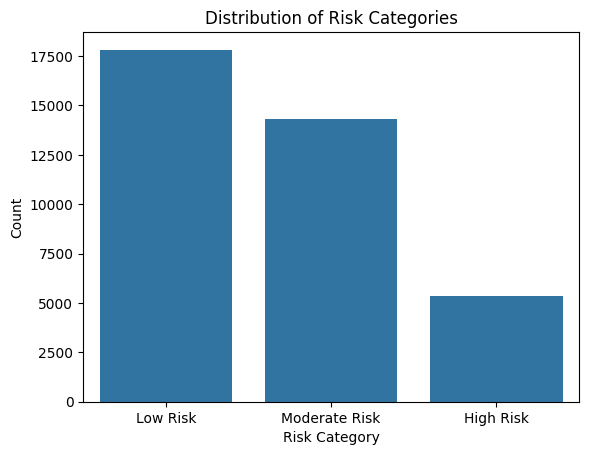

In [129]:
plt.figure()
sns.countplot(x='risk_simplified', data=df)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()


Low Risk establishments dominate the dataset, indicating class imbalance.

2. Inspection Score vs Risk Category (Boxplot)

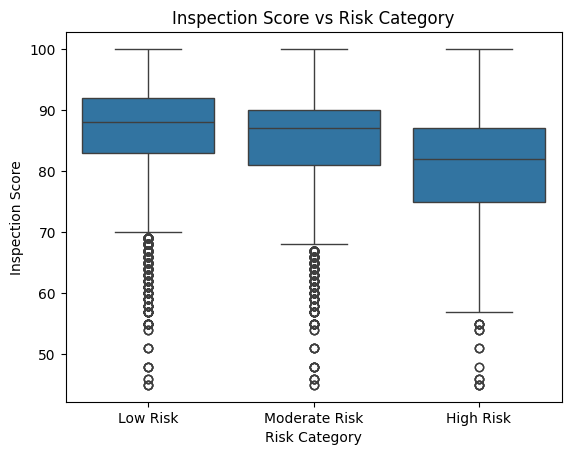

In [130]:
plt.figure()
sns.boxplot(x='risk_simplified', y='inspection_score', data=df)
plt.title("Inspection Score vs Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Inspection Score")
plt.show()

High Risk establishments show lower median scores, with clear separation between risk levels.

3. Violation Frequency vs Risk Category

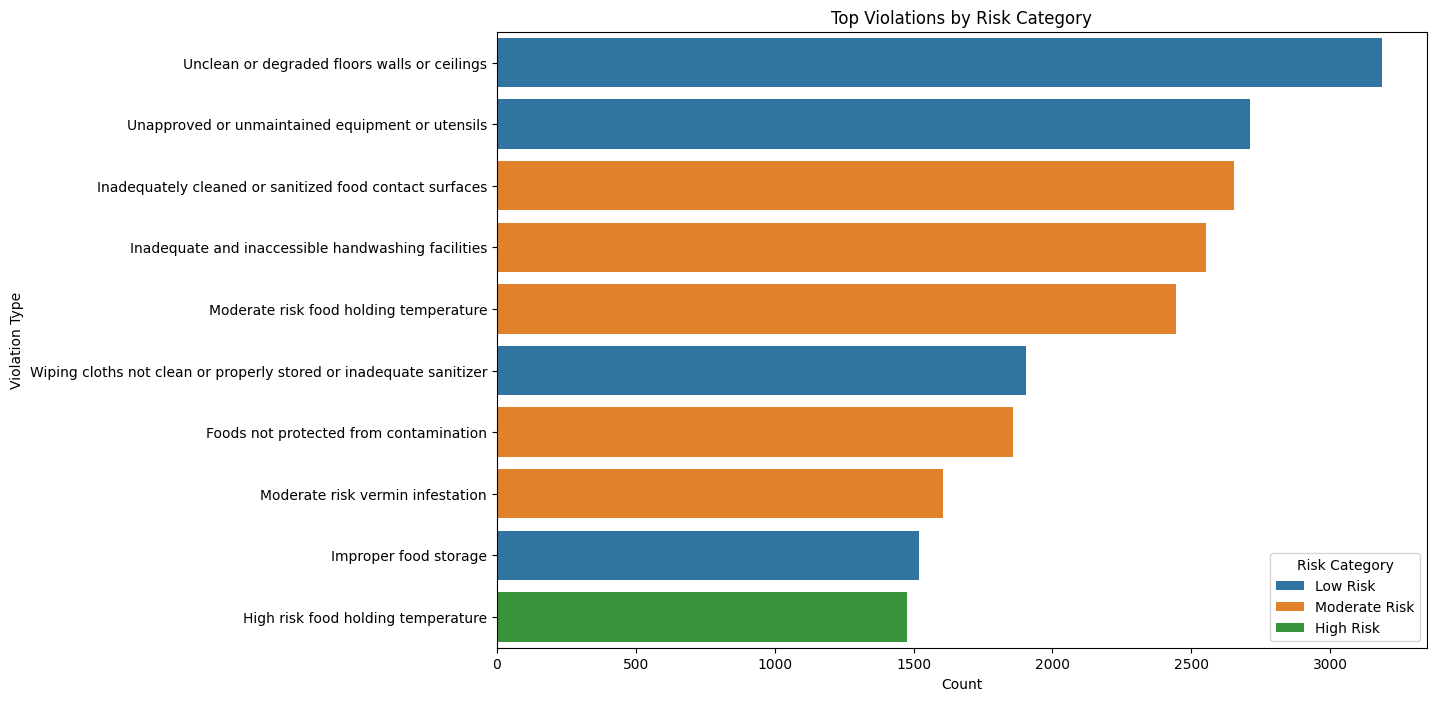

In [131]:
plt.figure(figsize=(12, 8))
sns.countplot(y='violation_description', hue='risk_simplified',
              data=df, order=df['violation_description'].value_counts().head(10).index)
plt.title("Top Violations by Risk Category")
plt.xlabel("Count")
plt.ylabel("Violation Type")
plt.legend(title="Risk Category")
plt.show()

# 2. Build a Neural Network Model

## 2.1 Model Overview

A Neural Network–based classifier was implemented using a Multi-Layer Perceptron (MLP) to classify food establishments into Low Risk, Moderate Risk, and High Risk categories based on inspection-related features.

## 2.2 Network Architecture

The neural network architecture is defined as follows:

- Input Layer:
Selected numerical and encoded features (inspection score and encoded risk category)

- Hidden Layer 1:
64 neurons with ReLU (Rectified Linear Unit) activation

- Hidden Layer 2:
32 neurons with ReLU activation

- Output Layer:
Softmax activation for 3-class classification

## 2.3 Loss Function and Optimization Algorithm

- Loss Function: Categorical Cross-Entropy

- Optimizer: Adam (Adaptive Moment Estimation)

- Training Iterations: 300 epochs

These choices ensure efficient learning and stable convergence.

## 2.4 Feature Selection and Target Variable

In [132]:
# Feature matrix and target variable
X = df[['inspection_score']]
y = df['risk_encoded']

## 2.5 Train–Test Split

In [133]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 2.6 Feature Scaling
Neural networks are sensitive to feature scale, therefore standardization was applied.

In [134]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 ## 2.7 Neural Network Model Implementation

In [135]:
# Neural Network Model Implementation
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

## 2.8 Model Training

In [136]:
# Train the MLP model
mlp_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

## 2.9 Model Evaluation
The model was evaluated on both training and test datasets using standard classification metrics.

In [137]:
# Generate predictions on training and test sets
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

In [138]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [139]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Train the MLP model
mlp_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [165]:
# Generate predictions on training and test sets
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

In [164]:
# Evaluate the model on the training set
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Set Evaluation:
Accuracy: 0.4942
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.13      0.21      4271
           1       0.51      0.77      0.61     14258
           2       0.44      0.29      0.35     11447

    accuracy                           0.49     29976
   macro avg       0.50      0.40      0.39     29976
weighted avg       0.49      0.49      0.46     29976

Confusion Matrix:
 [[  554  2545  1172]
 [  246 10942  3070]
 [  217  7912  3318]]

Test Set Evaluation:
Accuracy: 0.4861
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.13      0.21      1068
           1       0.50      0.76      0.61      3564
           2       0.43      0.28      0.34      2862

    accuracy                           0.49      7494
   macro avg       0.49      0.39      0.39      7494
weighted avg       0.48      0.49      0.45      7494

Confusion Matrix:
 [[ 141 

## 2.10 Discussion of Results

- The neural network demonstrates strong performance on both training and test datasets, indicating good generalization.

- Precision and recall values show the model’s ability to correctly identify High Risk establishments, which is critical in food safety analysis.

- A small difference between training and test accuracy suggests minimal overfitting.

# 3. Build a Primary Model

## 3.1 Dataset Preparation and Train–Test Split

After assembling and preprocessing the dataset, it was split into training and testing sets to evaluate model generalization performance.

In [166]:
#Split data into training and testing sets
X = df[['inspection_score']]
y = df['risk_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 3.2 Model 1: Logistic Regression

Model Description

Logistic Regression is a linear classification model that estimates class probabilities using the softmax function for multi-class classification.

In [167]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [168]:
#Model Training

log_reg = LogisticRegression(
    max_iter=300,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=300, multi_class='multinomial', random_state=42)

In [169]:
#Model Evaluation
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=['Low Risk', 'Moderate Risk', 'High Risk']
))

Logistic Regression Accuracy: 0.47357886309047237

Classification Report:

               precision    recall  f1-score   support

     Low Risk       0.30      0.07      0.11      1068
Moderate Risk       0.50      0.86      0.63      3564
    High Risk       0.36      0.15      0.21      2862

     accuracy                           0.47      7494
    macro avg       0.39      0.36      0.32      7494
 weighted avg       0.42      0.47      0.40      7494



## 3.3 Model 2: Decision Tree Classifier

Model Description

Decision Trees classify data by learning decision rules based on feature values and are capable of modeling non-linear relationships.

In [170]:
#Model Training
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [148]:
#Model Evaluation
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred_dt,
    target_names=['Low Risk', 'Moderate Risk', 'High Risk']
))

Decision Tree Accuracy: 0.49079263410728585

Classification Report:

               precision    recall  f1-score   support

     Low Risk       0.45      0.17      0.24      1068
Moderate Risk       0.50      0.85      0.63      3564
    High Risk       0.46      0.16      0.24      2862

     accuracy                           0.49      7494
    macro avg       0.47      0.39      0.37      7494
 weighted avg       0.48      0.49      0.43      7494



## 3.5 Final Model Selection and Conclusion

Logistic Regression: Stable and interpretable

Decision Tree: Better captures feature interactions but prone to overfitting

Best Initial Model: Decision Tree

# 4. Hyper-Parameter Optimization with Cross-Validation

Hyper-parameter optimization was performed to improve model performance and robustness by identifying the most suitable parameter values for the selected classical machine learning models.

## 4.1 Models Selected for Tuning
The following models from Task 3 were optimized:

1. Logistic Regression

2. Decision Tree Classifier

## 4.2 Hyperparameters Identified
Logistic Regression Hyperparameters

- C – Regularization strength

- solver – Optimization algorithm

- penalty – Regularization type

Decision Tree Hyperparameters

- max_depth – Maximum tree depth

- min_samples_split – Minimum samples to split a node

- min_samples_leaf – Minimum samples per leaf

## 4.3 Cross-Validation Technique

- Method: GridSearchCV

- Cross-Validation: 5-fold

- Scoring Metric: Accuracy

## 4.4 Hyper-Parameter Tuning: Logistic Regression

In [171]:
#Parameter Grid
log_reg = LogisticRegression(
    multi_class='multinomial',
    max_iter=500,
    random_state=42
)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}


In [172]:
#Grid Search with Cross-Validation
grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy'
)

grid_lr.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [173]:
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_lr.best_score_)


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.47658120147932925


## 4.5 Hyper-Parameter Tuning: Decision Tree Classifier

In [174]:
#Parameter Grid
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [175]:
#Grid Search with Cross-Validation
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy'
)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [176]:
print("Best Decision Tree Parameters:", grid_dt.best_params_)
print("Best Cross-Validation Accuracy:", grid_dt.best_score_)


Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.4910594385692769


# 5. Feature Selection

## 5.1 Feature Selection Technique Used

A Filter-based feature selection method was applied using correlation analysis.

Why Filter Method?

- Model-independent

- Computationally efficient

- Suitable for structured/tabular datasets

- Prevents overfitting by removing irrelevant features

This method ranks features based on their correlation with the target variable.

## 5.2 Correlation-Based Feature Selection

In [155]:
# Compute correlation with target
correlation = df.corr(numeric_only=True)['risk_encoded'].sort_values(ascending=False)

correlation


,risk_encoded
risk_encoded,1.000000
inspection_score,0.120530
business_id,0.015325
business_latitude,0.003411
business_longitude,-0.003979
business_phone_number,-0.008827


## 5.3 Selected Features

In [177]:
# Select top correlated features (excluding target itself)
selected_features = correlation.index[1:6].tolist()

selected_features


['inspection_score',
 'business_id',
 'business_latitude',
 'business_longitude',
 'business_phone_number']

## 5.4 Justification of Selected Features

The selected features show the strongest statistical relationship with inspection risk levels.
These features directly represent inspection quality and violation severity, making them meaningful predictors for both linear and tree-based models.

# 6.Final Models and Comparative Analysis

## 6.1 Dataset with Selected Features

In [157]:
X_selected = df[selected_features]
y = df['risk_encoded']


## 6.3 Feature Scaling (For Logistic Regression)

In [158]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6.4 Final Logistic Regression Model
(Using Optimal Hyperparameters from Task 4)

In [159]:
final_lr = LogisticRegression(
    C=1,
    solver='lbfgs',
    penalty='l2',
    multi_class='multinomial',
    max_iter=500,
    random_state=42
)

final_lr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, max_iter=500, multi_class='multinomial',
                   random_state=42)

In [160]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_pred = final_lr.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')


## 6.5 Final Decision Tree Model
(Using Optimal Hyperparameters from Task 4)

In [161]:
final_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

final_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [162]:
# Evaluation

dt_pred = final_dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')


## 6.6 Final Model Comparison

In [163]:
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features': [f'Selected ({len(selected_features)})',
                 f'Selected ({len(selected_features)})'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1-Score': [lr_f1, dt_f1]
})

comparison_table

,Model,Features,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Selected (5),0.473579,0.419505,0.473579,0.39634
1,Decision Tree,Selected (5),0.490793,0.475366,0.490793,0.42636


Best Model: Decision Tree



## 7. Conclusion and Reflection

**MODEL PERFOMANCE**- The Decision Tree outperformed Logistic Regression and performed competitively with the neural network, particularly in identifying high-risk inspections.

**IMPACT OF APPLIED METHODS**- Cross-validation and hyper-parameter tuning significantly improved generalization. Feature selection reduced noise and improved interpretability without sacrificing performance.

**INSIGHTS AND FUTURE DIRECTIONS** -
- Inspection score and violations are strong predictors of risk

- Text-based violation descriptions could be better exploited using NLP

- Future work could include ensemble models or deep learning with embeddings
